<a href="https://colab.research.google.com/github/dawan0111/my-colab/blob/main/Andrew%20Ng%20Machine%20Learning/2%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning 2주차 여러개의 입력에서의 선형 회귀, features Scaling, Normal Equation
features가 여러개 일때 (경사하강법, 손실함수), features Scaling, Normal Equation

## 사용할 라이브러리 불러오기

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## 데이터 생성 및 학습 함수 생성

In [112]:
def makeData(theta_0, theta_1, theta_2):
  X0_train = np.random.rand(100)
  X1_train = np.random.rand(100)
  Y = theta_0 + X0_train * theta_1 + X1_train * theta_2

  plt.figure(figsize=(8, 6))
  plt.scatter(X0_train, Y - X1_train * theta_2, label='real')
  plt.show()
  return (X0_train, X1_train, Y)

def learning(learning_rate, train0, train1):
  theta_0_pred = np.random.uniform(-1, 1)
  theta_1_pred = np.random.uniform(-1, 1)
  theta_2_pred = np.random.uniform(-1, 1)
  pred_arr = []

  for epoch in range(150):
    Y_pred = theta_0_pred + theta_1_pred * train0 + theta_2_pred * train1

    temp0 = theta_0_pred - learning_rate * (Y_pred - Y).mean()
    temp1 = theta_1_pred - learning_rate * ((Y_pred - Y) * train0).mean()
    temp2 = theta_2_pred - learning_rate * ((Y_pred - Y) * train1).mean()

    theta_0_pred = temp0
    theta_1_pred = temp1
    theta_2_pred = temp2
    pred_arr.append(abs((Y_pred - Y).sum()))

  plt.figure(figsize=(8, 6))
  plt.plot(np.array(list(range(150))), pred_arr)
  plt.show()
  print(theta_0_pred, theta_1_pred, theta_2_pred)


## 여러 입력에서의 선형회귀
선형회기 문제중 features가 여러개라도 1개 일때와 별 다를꺼 없다. 만약 n개의 features, m개의 dataset이 있다면 다음과 같다

### 가설함수
$$
h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \cdots + \theta_nx_n
$$
가설함수 행렬 표현
$$
h_\theta(x) = \theta^Tx
$$

마찬가지로 Grident Descent를 통하여 손실함수 값을 최소화 한다.

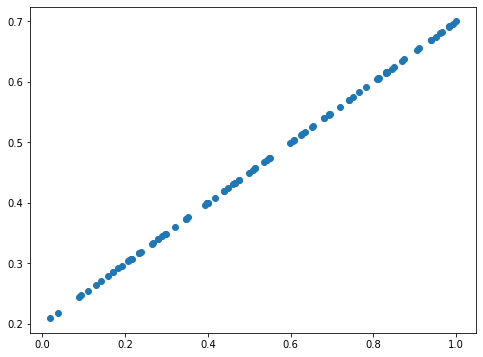

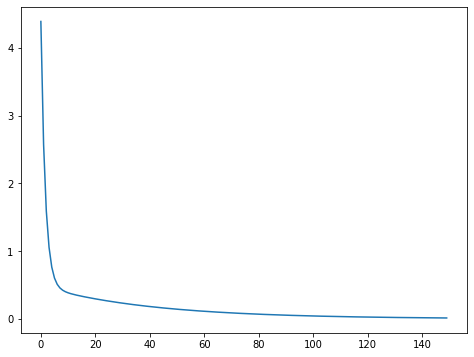

0.20163750997546093 0.507921788345101 0.6876820667518708


In [113]:
X0_train, X1_train, Y = makeData(0.2, 0.5, 0.7)
learning(0.3, X0_train, X1_train)

## feature Scaling
각각의 feature 마다 값의 범위가 제 각각일 것이다. 만약 feature 간의 값 차이가 클 경우 비효율 적으로 진동하게 된다. 성능 향상을 위해 값의 범위를 일정 범위로 조정하는 기법을 feature Scaling 이라고 한다.

$$
x_i = \frac{x_i - u_i}{s_i}
$$
s_i는 값의 범위, u_i는 값의 평균을 나타낸다. 위 수식의 결과는 -0.5 ~ 0.5 범위의 값을 반환하게 된다.

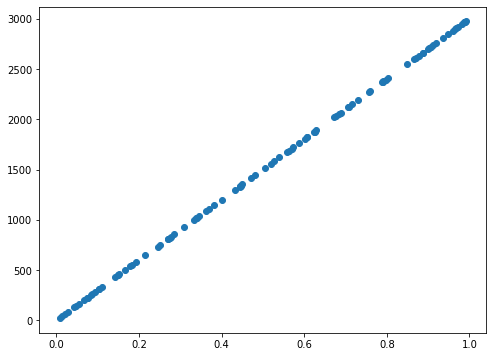

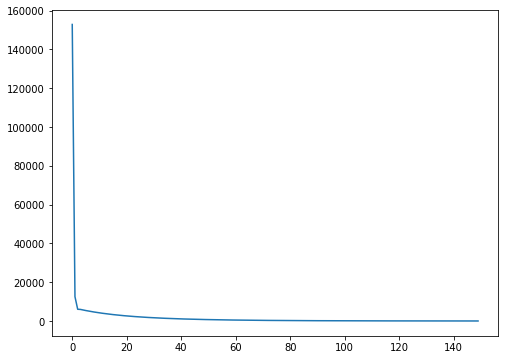

3.925724793901106 2997.0933723999815 -4.346040244453773


In [114]:
X0_train, X1_train, Y = makeData(0.2, 3000, 0.3)
learning(0.7, X0_train, X1_train)

위 그래프는 특정 feature가 다른 feature에 비해 월등히 높다. 그럴때 예측한 세타값을 보게되면 예상과 다른 값들이 등장하게 된다. 하지만 학습 횟수를 늘릴 경우 점차 비슷한 값으로 찾아갈 것이다. 하지만 feature 값의 범위를 -0.5 ~ 0.5 정도로 비슷하게 만들어 준다면 학습 횟수를 줄이고도 비슷한 값을 찾아낼 수 있게된다. 이런 범위를 기법을 features Scaling 기법이라 한다.

## Normal Equation
경사하강법으로 최적의 세타값을 찾았지만 반복없이 한번의 연산으로 최적의 세타값을 찾을 수 있는 방법이 있다. 바로 Normal Equation 이다.

$$
\theta = (X^TX)^{-1}X^Ty
$$

하지만 연산이 길어 특성 값(n)이 10^6 이상 이라면 시간이 너무 오래 걸릴 수 있고, 특이행렬일 경우 역행렬이 없어 연산을 못한다. (이런 경우는 거의 없다고 한다)

In [168]:
x0 = np.ones(shape=(10, 1), dtype=int)
x1 = np.random.randint(size=10, low=1, high=10)
x2 = np.random.randint(size=10, low=6, high=8)
y = 2 + x1 * 3 + x2 * 4
X = np.c_[x0, x1, x2]

A = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
A

array([2., 3., 4.])